In [12]:
import numpy as np
from scipy.stats import kstest
import pandas as pd
import math
import random
import scipy.stats as stats
import matplotlib.pyplot as plt

$$
Random \space number \space generator
$$

In [13]:
def is_power_of_two(m):
    return (m != 0) and (m & (m - 1) == 0)

def is_prime(n):
    if n <= 1:
        return False
    elif n == 2:
        return True
    else:
        for i in range(2, int(n**0.5)+1):
            if n % i == 0:
                return False
        return True

#Needed
X0 = 123457
a = 16807
c = 0
m = 2**31-1
num_of_number_gen = 3



R0 = X0/m
print(X0)
print('Ro = ', R0)
for i in range(num_of_number_gen):
    X0 = (a*X0+c)%(m)
    print(X0)
    R0 = X0/(m)           # m + 1 for large number of m
    print('Ro = ', R0)

if is_power_of_two(m) and c != 0 :
    print('The longest possible period is', m)
elif is_power_of_two(m) and c == 0 :
    print('The longest possible period is', m/4)
elif is_prime(m) and c == 0:
    print('The longest possible period is', m-1)
    

123457
Ro =  5.7489145573922035e-05
2074941799
Ro =  0.9662200696609077
559872160
Ro =  0.2607107908747675
1645535613
Ro =  0.7662622322171285
The longest possible period is 2147483646


$$
Chi-Square
$$

$$
K-S \space Test
$$

In [14]:
def ks_critical_value(alpha, n):
    """计算K-S检验的临界值（对于任意样本量）"""
    # 计算逆Kolmogorov-Smirnov分布值
    ks_stat = stats.kstwobign.ppf(1 - alpha)
    return ks_stat / np.sqrt(n)

def ecdf(data):
    """计算给定数据的ECDF"""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y

# 示例数据
data = [2.2, 3.1, 3.5, 4.0, 4.8, 5.6]

# 计算ECDF
x, y = ecdf(data)

# 输出结果
for xi, yi in zip(x, y):
    print(f"{xi}: {yi}")

# 计算样本均值和标准差
mean = np.mean(data)
std = np.std(data)

# 计算理论正态分布的CDF
cdf_theoretical = stats.norm.cdf(x, loc=mean, scale=std)

# 计算ECDF与CDF之间的差异（绝对值）
differences = np.abs(y - cdf_theoretical)

# 找到最大差异（D值）
D = np.max(differences)

# 输出D值
print("D value:", D)


# 样本量和显著性水平
n = 6                                   #Needed
alpha = 0.05                            #Needed

# 计算临界值
critical_value = ks_critical_value(alpha, n)

# 输出临界值
print("Critical value:", critical_value)

print('D value < Critical value == ', D < critical_value)

2.2: 0.16666666666666666
3.1: 0.3333333333333333
3.5: 0.5
4.0: 0.6666666666666666
4.8: 0.8333333333333334
5.6: 1.0
D value: 0.12941862235228357
Critical value: 0.5544414477847298
D value < Critical value ==  True


$$
自相关系数
$$

In [15]:
# 创建一组示例数据
data = np.array([1, 2, 3, 4, 5, 16, 17, 18, 19, 20])

# 将数据转换为Series对象
data_series = pd.Series(data)

# 计算自相关系数
acf = data_series.autocorr()

# 输出结果
print('自相关系数:', acf)

自相关系数: 0.9078341013824883


$$
Inverse \space Transform
$$

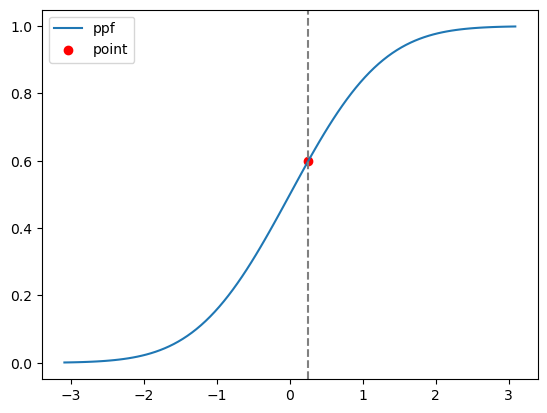

X value =  0.2533471031357997


In [32]:
# define the normal distribution
mu = 0
sigma = 1
x = np.linspace(stats.norm.ppf(0.001, mu, sigma), stats.norm.ppf(0.999, mu, sigma), 100)

perc = 0.6

# calculate the cdf and ppf values
y = stats.norm.cdf(x, mu, sigma)
x_ppf = stats.norm.ppf(y, mu, sigma)

# plot the ppf curve and the point based on given y
fig, ax = plt.subplots()
ax.plot(x_ppf, y, label='ppf')
ax.axvline(x=stats.norm.ppf(perc, mu, sigma), linestyle='--', color='gray')  # example y-value
ax.scatter(stats.norm.ppf(perc, mu, sigma), perc, color='red', label='point')  # example point
ax.legend()
plt.show()

print('X value = ', stats.norm.ppf(perc, mu, sigma))


$$
Q-Q\space plot
$$

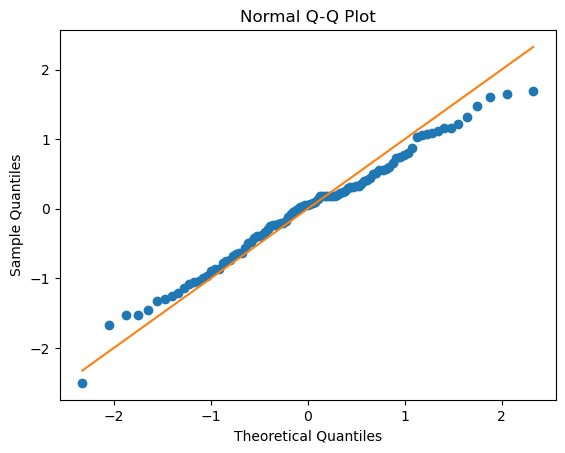

In [17]:
# Generate a sample of normally distributed data
mu, sigma = 0, 1
sample = np.random.normal(mu, sigma, 100)

# Create a normal distribution object
norm_dist = stats.norm(mu, sigma)

# Generate the theoretical quantiles
theoretical_quantiles = norm_dist.ppf(np.linspace(0.01, 0.99, 99))

# Generate the sample quantiles
sample_quantiles = np.quantile(sample, np.linspace(0.01, 0.99, 99))

# Create the Q-Q plot
plt.plot(theoretical_quantiles, sample_quantiles, 'o')
plt.plot(theoretical_quantiles, theoretical_quantiles, '-')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Normal Q-Q Plot')
plt.show()

$$
Confidence \space interval
$$

In [18]:
# Generate a random sample of data
data = np.random.normal(loc=10, scale=2, size=120)

# Calculate the sample mean and standard deviation
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)

# Set the confidence level and calculate the critical value
conf_level = 0.95
df = len(data) - 1
t_crit = stats.t.ppf((1 + conf_level) / 2, df)

# Calculate the margin of error and the confidence interval
margin_of_error = t_crit * sample_std / np.sqrt(len(data))
conf_interval = sample_mean - margin_of_error, sample_mean + margin_of_error

print("Sample Mean:", sample_mean)
print("Sample Standard Deviation:", sample_std)
print('t_crit:',t_crit)
print("Confidence Interval:", conf_interval)

Sample Mean: 9.940048412794477
Sample Standard Deviation: 1.872081697868539
t_crit: 1.980099876426006
Confidence Interval: (9.601655490336292, 10.278441335252662)


In [19]:
sample_mean = 5.8               #Needed
sample_std = 1.6                #Needed
data_len = 120                  #Needed
conf_level = 0.95               #Needed


t_crit = stats.t.ppf((1 + conf_level) / 2, data_len -1)


margin_of_error = t_crit * sample_std / np.sqrt(data_len)
margin_of_risk = t_crit * sample_std * np.sqrt(1+1/data_len)

conf_interval = sample_mean - margin_of_error, sample_mean + margin_of_error
predict_interval = sample_mean - margin_of_risk, sample_mean + margin_of_risk

print("Sample Mean:", sample_mean)
print("Sample Standard Deviation:", sample_std)
print('t_crit:',t_crit)
print()

print("margin_of_error:", margin_of_error)
print("Confidence Interval:", conf_interval)
print()
print('margin_of_risk:',margin_of_risk)
print("Prediction Interval:", predict_interval)



Sample Mean: 5.8
Sample Standard Deviation: 1.6
t_crit: 1.980099876426006

margin_of_error: 0.28921209824845745
Confidence Interval: (5.510787901751542, 6.089212098248457)

margin_of_risk: 3.1813330807330322
Prediction Interval: (2.6186669192669676, 8.981333080733032)


In [ ]:
data = np.random.exponential()